## Bonus Assignment 

(if dataset has time-series like features) 3-layer Recurrent Neural Network with Keras

<hr>

## **Linear Regression (With Time Series Data)**

### About The Dataset 

**Context**

This file contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com. The variables have complex seasonality that is keyed to the day of the week and to the academic calendar. The patterns you you see here are similar in principle to what you would see in other daily data with day-of-week and time-of-year effects. Some good exercises are to develop a 1-day-ahead forecasting model, a 7-day ahead forecasting model, and an entire-next-week forecasting model (i.e., next 7 days) for unique visitors.

**Content**

The variables are daily counts of page loads, unique visitors, first-time visitors, and returning visitors to an academic teaching notes website. There are 2167 rows of data spanning the date range from September 14, 2014, to August 19, 2020. A visit is defined as a stream of hits on one or more pages on the site on a given day by the same user, as identified by IP address. Multiple individuals with a shared IP address (e.g., in a computer lab) are considered as a single user, so real users may be undercounted to some extent. A visit is classified as "unique" if a hit from the same IP address has not come within the last 6 hours. Returning visitors are identified by cookies if those are accepted. All others are classified as first-time visitors, so the count of unique visitors is the sum of the counts of returning and first-time visitors by definition. The data was collected through a traffic monitoring service known as StatCounter.

**Import Libraries**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('./daily-website-visitors.csv')
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [71]:
df.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [72]:
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the dataframe by date
df.sort_values('Date', inplace=True)

# Convert 'Page.Loads' to numeric after removing commas
df['Page.Loads'] = df['Page.Loads'].replace(',', '', regex=True).astype(float)
df['Unique.Visits'] = df['Unique.Visits'].replace(',', '', regex=True).astype(float)
df['First.Time.Visits'] = df['First.Time.Visits'].replace(',', '', regex=True).astype(float)

# Convert target variable to numeric
df['Returning.Visits'] = pd.to_numeric(df['Returning.Visits'], errors='coerce')

# Drop rows with missing values in the target variable
df = df.dropna(subset=['Returning.Visits'])

# Extract features and target variable
features = df[['Day.Of.Week', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits']]
target = df['Returning.Visits']

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True))
model.add(SimpleRNN(50, activation='relu', return_sequences=True))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))  # Adjust activation based on your task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=8, validation_data=(X_test_reshaped, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

# Predict the target variable on the test set
y_pred = model.predict(X_test_reshaped)

# Flatten the predictions and true values
y_pred = y_pred.flatten()
y_test = np.array(y_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score on Test Set: {r2}')


Epoch 1/50
217/217 - 3s - loss: 161333.7031 - val_loss: 8737.4619 - 3s/epoch - 13ms/step
Epoch 2/50
217/217 - 1s - loss: 8088.7798 - val_loss: 5998.6763 - 500ms/epoch - 2ms/step
Epoch 3/50
217/217 - 0s - loss: 6185.3809 - val_loss: 5280.6641 - 500ms/epoch - 2ms/step
Epoch 4/50
217/217 - 1s - loss: 5794.4292 - val_loss: 5209.1792 - 502ms/epoch - 2ms/step
Epoch 5/50
217/217 - 1s - loss: 5705.1191 - val_loss: 5151.1108 - 501ms/epoch - 2ms/step
Epoch 6/50
217/217 - 1s - loss: 5664.9058 - val_loss: 5125.3481 - 505ms/epoch - 2ms/step
Epoch 7/50
217/217 - 1s - loss: 5631.2861 - val_loss: 5088.6187 - 562ms/epoch - 3ms/step
Epoch 8/50
217/217 - 1s - loss: 5589.2305 - val_loss: 5060.1689 - 524ms/epoch - 2ms/step
Epoch 9/50
217/217 - 1s - loss: 5578.5327 - val_loss: 5027.9648 - 529ms/epoch - 2ms/step
Epoch 10/50
217/217 - 1s - loss: 5565.6509 - val_loss: 5123.6719 - 658ms/epoch - 3ms/step
Epoch 11/50
217/217 - 1s - loss: 5549.4404 - val_loss: 4973.3076 - 547ms/epoch - 3ms/step
Epoch 12/50
217/217

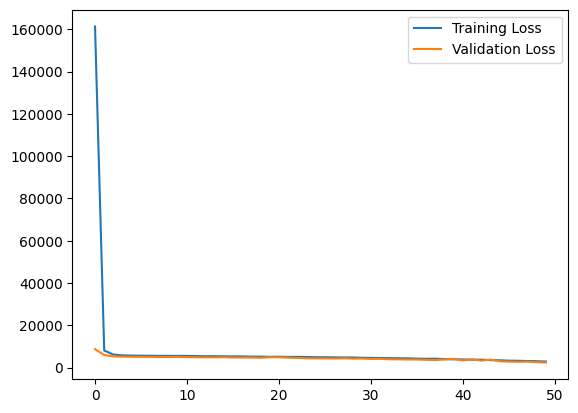

In [75]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

<hr>

## **Binary Classification (With Time Series Data)**

For this part we convert my regression dataset to a classification task and then create our model.

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score

# Choose a threshold for 'Returning.Visits' to create a binary target variable
threshold = 200  # You can adjust this threshold based on your specific requirements

# Create a binary target variable ('1' if 'Returning.Visits' is above the threshold, '0' otherwise)
df['Binary_Target'] = (df['Returning.Visits'] > threshold).astype(int)

# Drop 'Returning.Visits' column if you no longer need it
df = df.drop(['Returning.Visits'], axis=1)

# Extract features and target variable
features = df[['Day.Of.Week', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits']]
target = df['Binary_Target']

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True))
model.add(SimpleRNN(50, activation='relu', return_sequences=True))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=8, validation_data=(X_test_reshaped, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Binary Crossentropy Loss on Test Set: {loss}')
print(f'Accuracy on Test Set: {accuracy}')

# Predict the target variable on the test set
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Calculate accuracy
accuracy_binary = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set (Binary): {accuracy_binary}')


Epoch 1/10
217/217 - 3s - loss: 0.1382 - accuracy: 0.9677 - val_loss: 0.0576 - val_accuracy: 0.9770 - 3s/epoch - 15ms/step
Epoch 2/10
217/217 - 1s - loss: 0.0586 - accuracy: 0.9792 - val_loss: 0.0522 - val_accuracy: 0.9770 - 534ms/epoch - 2ms/step
Epoch 3/10
217/217 - 1s - loss: 0.0548 - accuracy: 0.9792 - val_loss: 0.0458 - val_accuracy: 0.9770 - 541ms/epoch - 2ms/step
Epoch 4/10
217/217 - 1s - loss: 0.0524 - accuracy: 0.9781 - val_loss: 0.0405 - val_accuracy: 0.9770 - 533ms/epoch - 2ms/step
Epoch 5/10
217/217 - 1s - loss: 0.0506 - accuracy: 0.9804 - val_loss: 0.0397 - val_accuracy: 0.9793 - 534ms/epoch - 2ms/step
Epoch 6/10
217/217 - 1s - loss: 0.0494 - accuracy: 0.9809 - val_loss: 0.0339 - val_accuracy: 0.9816 - 574ms/epoch - 3ms/step
Epoch 7/10
217/217 - 1s - loss: 0.0509 - accuracy: 0.9809 - val_loss: 0.0369 - val_accuracy: 0.9816 - 530ms/epoch - 2ms/step
Epoch 8/10
217/217 - 1s - loss: 0.0509 - accuracy: 0.9804 - val_loss: 0.0356 - val_accuracy: 0.9816 - 523ms/epoch - 2ms/step
Ep